<a href="https://colab.research.google.com/github/bs3537/DS-Unit-4-Sprint-1-NLP/blob/master/Completed_Bhav_LS_DS_411_Text_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

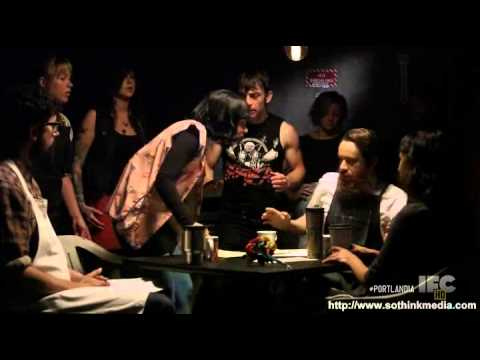

In [0]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [0]:
%pwd

'C:\\Users\\bhavn\\OneDrive\\Desktop\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [0]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [0]:
#Cleaning the dataset
shops_cleaned = shops.copy()

In [0]:
shops['full_review_text'].apply(lambda x: x.split(" ")[1]).isna().value_counts()

False    7616
Name: full_review_text, dtype: int64

In [0]:
shops.star_rating.value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [0]:
shops['star_rating'].apply(lambda x: x.split(" ")[1]).value_counts()

5.0    3780
4.0    2360
3.0     738
2.0     460
1.0     278
Name: star_rating, dtype: int64

In [0]:
shops['coffee_shop_name'].value_counts().head()

Epoch Coffee                       400
Halcyon                            300
The Factory - Cafe With a Soul     244
Venezia Italian Gelato             200
Houndstooth Coffee                 200
Name: coffee_shop_name, dtype: int64

In [0]:
#check for empty reviews
(shops['full_review_text'] == '').value_counts()

False    7616
Name: full_review_text, dtype: int64

In [0]:
shops_cleaned['date_reviewed'] = shops['full_review_text'].apply(lambda x: x.split(" ")[1])

In [0]:
shops_cleaned['full_review_text'] = shops['full_review_text'].apply(lambda x: " ".join(x.split(" ")[2:]))

In [0]:
shops_cleaned['star_rating'] = shops['star_rating'].apply(lambda x: float(x.split(" ")[1]))

In [0]:
#Another way to isolate dates using regex function (code from Bruno)
#dates = []
#for text in shops['full_review_text']:
    #dates.append(re.findall(r'\b[0-3]?[0-9]/[0-3]?[0-9]/(?:[0-9]{2})?[0-9]{2}\b', text)[0])

In [0]:
#Another way for isolating dates (by Sanjay Krisnaa: shops['full_review_date'] = shops['full_review_text'].str[:11])

In [0]:
shops_cleaned.shape

(7616, 4)

In [0]:
shops_cleaned.head()

,coffee_shop_name,full_review_text,star_rating,date_reviewed
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5.0,11/25/2016
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0,12/2/2016
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4.0,11/30/2016
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2.0,11/25/2016
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4.0,12/3/2016


In [0]:
from collections import Counter
import re
import squarify
import matplotlib.pyplot as ply
import seaborn as sns
import spacy
from spacy.tokenizer import Tokenizer
nlp = spacy.load("en_core_web_lg")

In [0]:
#tokenization using spacy
tokenizer = Tokenizer(nlp.vocab)
tokens = []

#Make tokens dataframe from full_review_txt column and using default spacy stop words
for doc in tokenizer.pipe(shops_cleaned['full_review_text'], batch_size=500):
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())
            
    tokens.append(doc_tokens)
    
shops_cleaned['review_tokens'] = tokens

In [0]:
shops_cleaned['review_tokens'].head()

0    [1, check-in, love, love, loved, atmosphere!, ...
1    [listed, date, night:, austin,, ambiance, aust...
2    [1, check-in, listed, brunch, spots, loved, ec...
3    [cool, decor!, good, drinks, nice, seating,  ,...
4    [1, check-in, located, northcross, mall, shopp...
Name: review_tokens, dtype: object

In [0]:
#import re
#shops['review_tokens'] = re.sub(r'[^a-zA-Z ^0-9]', '', shops['review_tokens'].text)

In [0]:
#count function code
from collections import Counter
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [0]:
wc = count(shops_cleaned['review_tokens'])

In [0]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
35,,4343,14990,1.0,0.036868,0.036868,0.570247
33,coffee,4210,8058,2.0,0.019819,0.056687,0.552784
98,place,3029,4264,3.0,0.010487,0.067174,0.397715
95,great,2438,3250,4.0,0.007993,0.075167,0.320116
278,it's,2061,3117,5.0,0.007666,0.082833,0.270614


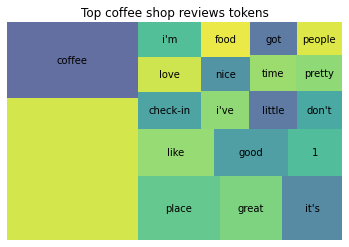

In [0]:
import matplotlib.pyplot as plt
wc_top20 = wc[wc['rank'] <= 20]
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.title('Top coffee shop reviews tokens')
plt.show()


In [0]:
#Lemmatization using Spacy

In [0]:
nlp = spacy.load("en_core_web_lg")


In [0]:
#get lemmas function for spacy:
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [0]:
shops_cleaned['reviews_lemmas'] = shops_cleaned['full_review_text'].apply(get_lemmas)

In [0]:
shops_cleaned['reviews_lemmas'].head()

0    [1, check, love, love, love, atmosphere, corne...
1    [list, Date, Night, Austin, Ambiance, Austin, ...
2    [1, check, list, Brunch, Spots, love, eclectic...
3    [cool, decor, good, drink, nice, seating,  ,  ...
4    [1, check, locate, Northcross, mall, shopping,...
Name: reviews_lemmas, dtype: object

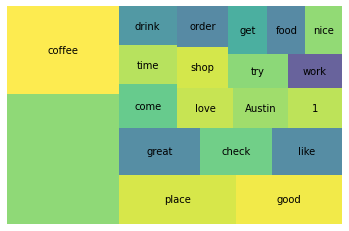

In [0]:
wc = count(shops_cleaned['reviews_lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [0]:
#Visualizing good coffee shop tokens
#New dataframe with coffee shops with ratings 4 or higher
good_shops = shops_cleaned[shops_cleaned['star_rating'] >= 4].copy()
good_shops.head()

,coffee_shop_name,full_review_text,star_rating,date_reviewed,review_tokens,reviews_lemmas
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5.0,11/25/2016,"[1, check-in, love, love, loved, atmosphere!, ...","[1, check, love, love, love, atmosphere, corne..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0,12/2/2016,"[listed, date, night:, austin,, ambiance, aust...","[list, Date, Night, Austin, Ambiance, Austin, ..."
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4.0,11/30/2016,"[1, check-in, listed, brunch, spots, loved, ec...","[1, check, list, Brunch, Spots, love, eclectic..."
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4.0,12/3/2016,"[1, check-in, located, northcross, mall, shopp...","[1, check, locate, Northcross, mall, shopping,..."
5,The Factory - Cafe With a Soul,1 check-in Very cute cafe! I think from the mo...,4.0,11/20/2016,"[1, check-in, cute, cafe!, think, moment, step...","[1, check, cute, cafe, think, moment, step, fi..."


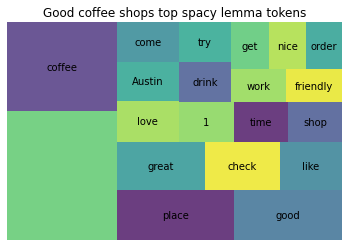

In [0]:
#Visualizing good coffee shops lemmas

wc1 = count(good_shops['reviews_lemmas'])
wc_top20 = wc1[wc1['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.title('Good coffee shops top spacy lemma tokens')
plt.show()

In [0]:
#Bad coffee shops lemmas visualization
bad_shops = shops_cleaned[shops_cleaned['star_rating'] < 4].copy()
bad_shops.head()


,coffee_shop_name,full_review_text,star_rating,date_reviewed,review_tokens,reviews_lemmas
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2.0,11/25/2016,"[cool, decor!, good, drinks, nice, seating, ,...","[cool, decor, good, drink, nice, seating, , ..."
8,The Factory - Cafe With a Soul,"1 check-in Ok, let's try this approach... Pro...",3.0,10/25/2016,"[1, check-in, ok,, let's, try, approach..., ,...","[1, check, ok, let, try, approach, , pro, mus..."
11,The Factory - Cafe With a Soul,"The store has A+ decoration, but honestly, the...",3.0,11/20/2016,"[store, a+, decoration,, honestly,, coffee, go...","[store, A+, decoration, honestly, coffee, good..."
12,The Factory - Cafe With a Soul,1 check-in Listed in 2016 - The Third Time is ...,3.0,11/17/2016,"[1, check-in, listed, 2016, time, charm!, fact...","[1, check, list, 2016, Time, Charm, Factory, a..."
25,The Factory - Cafe With a Soul,"Okay, so after visiting my friends in LA and t...",1.0,12/2/2016,"[okay,, visiting, friends, la, trying, mint, m...","[okay, visit, friend, LA, try, mint, mojito, i..."


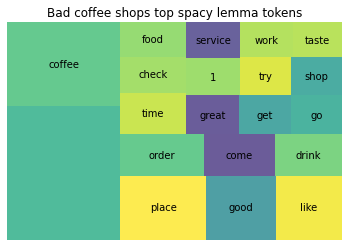

In [0]:
#Visualizing bad coffee shops lemmas

wc2 = count(bad_shops['reviews_lemmas'])
wc_top20 = wc2[wc2['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.title('Bad coffee shops top spacy lemma tokens')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [0]:
#Good coffee shops
wc1 = count(good_shops['reviews_lemmas'])
wc1.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
32,,3408,11626,1.0,0.039433,0.039433,0.555049
31,coffee,3907,8011,2.0,0.027172,0.066605,0.636319
87,place,3124,4796,3.0,0.016267,0.082872,0.508795
194,good,2947,4399,4.0,0.014921,0.097793,0.479967
83,great,2497,3459,5.0,0.011732,0.109525,0.406678
4,check,2686,2941,6.0,0.009975,0.119500,0.437459
201,like,1677,2434,7.0,0.008256,0.127756,0.273127
13,love,1589,2087,8.0,0.007079,0.134835,0.258795
46,Austin,1543,1986,9.0,0.006736,0.141571,0.251303
368,come,1480,1986,10.0,0.006736,0.148307,0.241042


In [0]:
wc1_select= wc1[['word', 'appears_in_pct']]

In [0]:
#Good coffee shop top tokens

wc1_select.head(10)

,word,appears_in_pct
32,,0.555049
31,coffee,0.636319
87,place,0.508795
194,good,0.479967
83,great,0.406678
4,check,0.437459
201,like,0.273127
13,love,0.258795
46,Austin,0.251303
368,come,0.241042


In [0]:
#Bad coffee shops
wc2 = count(bad_shops['reviews_lemmas'])
wc2.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
29,,935,3364,1.0,0.040662,0.040662,0.633469
28,coffee,930,2108,2.0,0.025480,0.066143,0.630081
10,place,753,1226,3.0,0.014819,0.080962,0.510163
26,good,644,996,4.0,0.012039,0.093001,0.436314
31,like,596,945,5.0,0.011423,0.104424,0.403794
74,order,431,763,6.0,0.009223,0.113647,0.292005
41,come,452,651,7.0,0.007869,0.121516,0.306233
33,drink,363,610,8.0,0.007373,0.128889,0.245935
482,time,419,607,9.0,0.007337,0.136226,0.283875
71,check,489,527,10.0,0.006370,0.142596,0.331301


In [0]:
wc2_select= wc2[['word', 'appears_in_pct']]

In [0]:
#Bad coffee shops top tokens

wc2_select.head(10)

,word,appears_in_pct
29,,0.633469
28,coffee,0.630081
10,place,0.510163
26,good,0.436314
31,like,0.403794
74,order,0.292005
41,come,0.306233
33,drink,0.245935
482,time,0.283875
71,check,0.331301


In [0]:
#Discussion:
#1. Good coffee shops = The word 'great' is used in the reviews among top ten used words but this word is not used in the reviews in bad coffee shops. 
# 2. The word 'love' is among top ten used words in the reviews for good coffee shops but this word is not present among top ten used owrds in the reviews for bad coffee shops.
# 3. Coffee shops in Austin appear to be good as this word is among top ten used words in the reviews for good coffee shops,
      #but it is not present among top ten used words in the reviews for bad coffee shops. 

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

